## Importing Libraries 


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
df = pd.read_csv("shopping_clustering_data.csv")


# Features to cluster

In [3]:
features = ["Age", "purchase_amount", "previous_purchases", 
            "review_rating", "subscription", "promo_used", "discount_used"]


In [4]:
X = df[features]

# Scale the data

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters (Elbow Method)

c:\Users\sainanthan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\sainanthan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\sainanthan\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sainanthan\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~

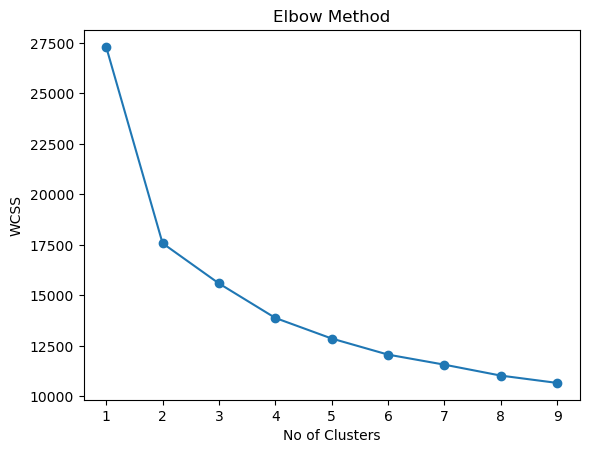

In [6]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

# Final Clustering with 3 clusters

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster Summary

In [8]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

               Age  purchase_amount  previous_purchases  review_rating  \
Cluster                                                                  
0        44.000000        58.919872           25.166667       3.734936   
1        44.010796        60.130454           25.056230       3.757715   
2        44.230769        59.491928           26.084520       3.742450   

         subscription  promo_used  discount_used  
Cluster                                           
0                 0.0         1.0            1.0  
1                 0.0         0.0            0.0  
2                 1.0         1.0            1.0  


# Visualize Clusters

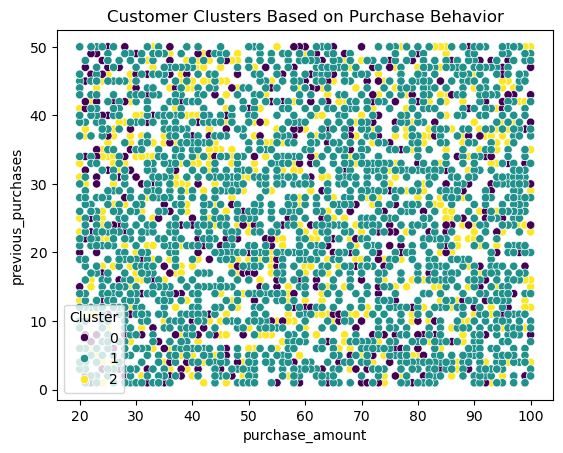

In [ ]:
sns.scatterplot(data=df, x="purchase_amount", y="previous_purchases", hue="Cluster", palette="viridis")
plt.title("Customer Clusters Based on Purchase Behavior")
plt.show()


In [12]:
df.to_csv("clustered_customers.csv", index=False)
